
# Automated Node out Degree Graph for level 2 Aggregation 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import csv
import os

In [1]:
import pandas as pd 
import os
import numpy as np
import csv
from collections import Counter
import matplotlib.pyplot as plt

In [15]:
# Directory containing the CSV files
folder_path = 'NodesDataLevel2/OnlyProtein'

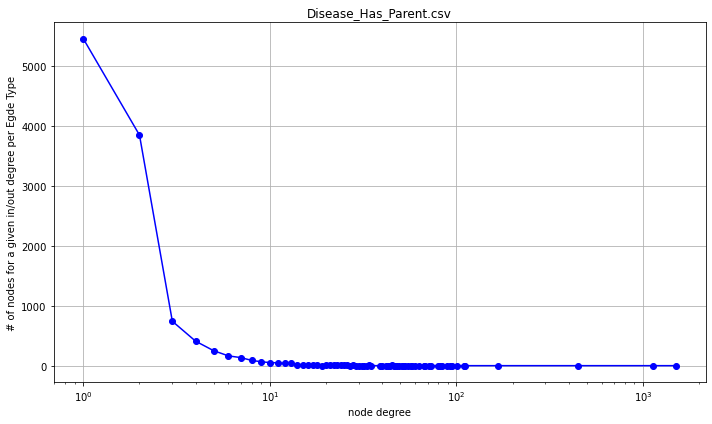

<Figure size 432x288 with 0 Axes>

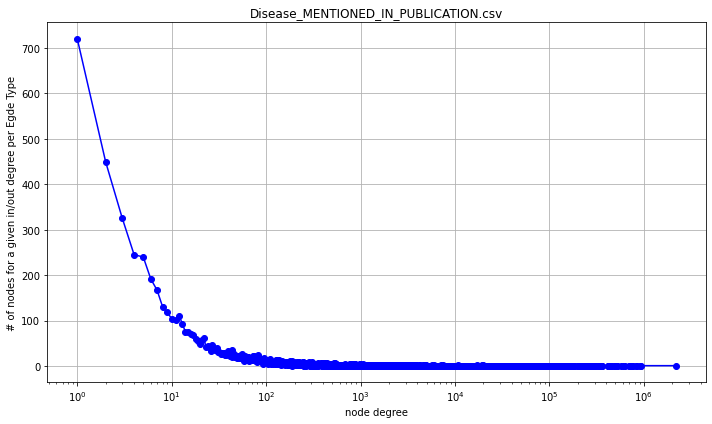

<Figure size 432x288 with 0 Axes>

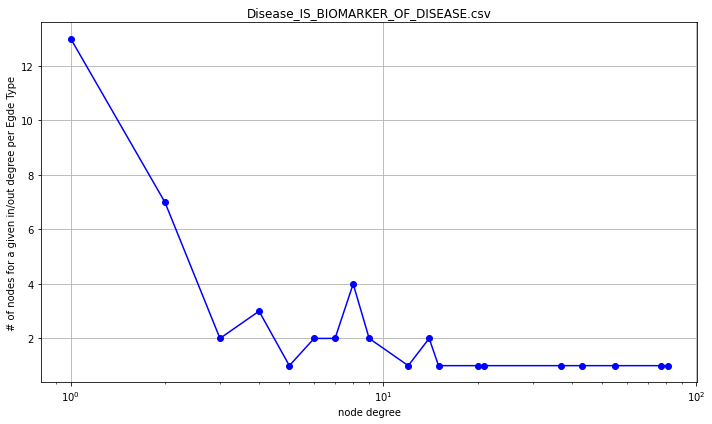

<Figure size 432x288 with 0 Axes>

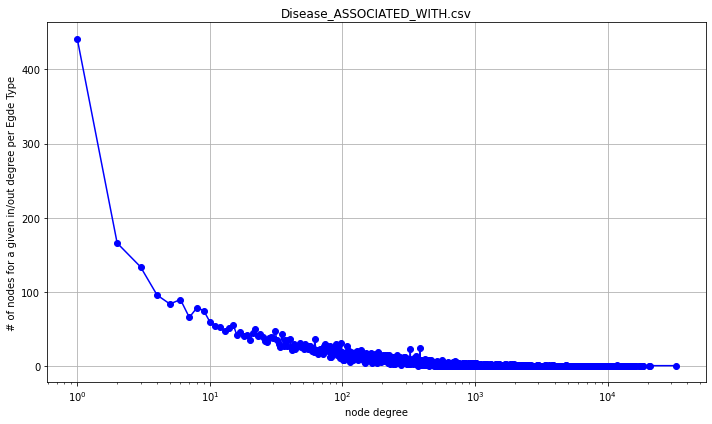

<Figure size 432x288 with 0 Axes>

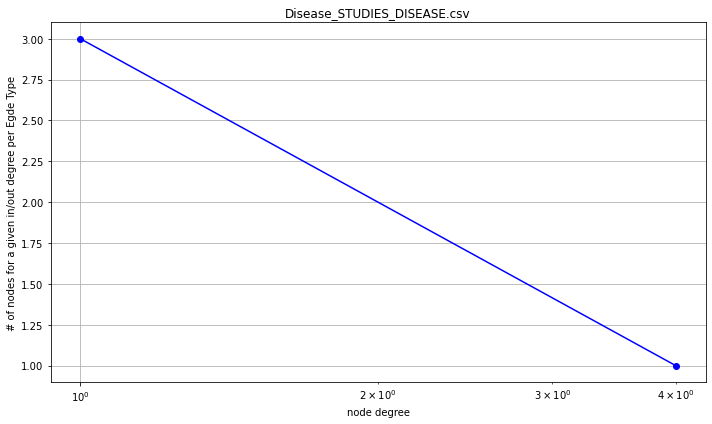

<Figure size 432x288 with 0 Axes>

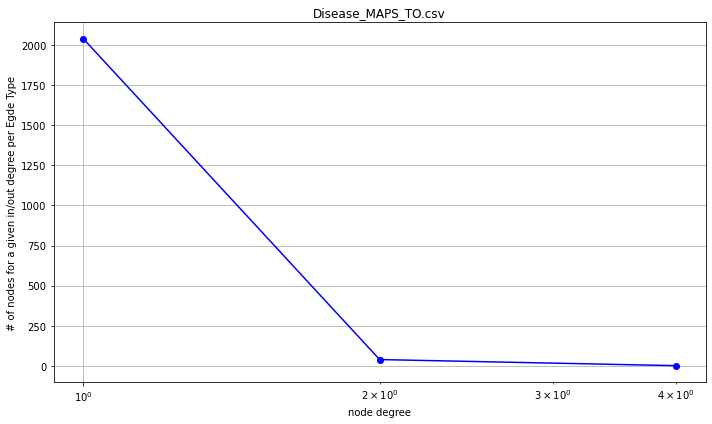

<Figure size 432x288 with 0 Axes>

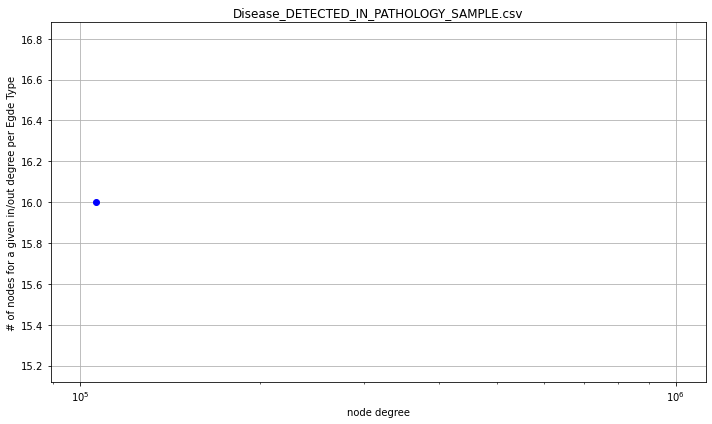

DONE


In [19]:
# Loop through each file in the directory
for filename in os.listdir(folder_path):
    
    #if filename.endswith('.csv'):
    
    matches = [".csv", "Disease"]

    if all(x in filename for x in matches):    
        filepath = os.path.join(folder_path, filename)
        # Initialize a list to store the numbers
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  

            for row in reader:
                # Ensure there's a second column
                if len(row) >= 2:
                    try:
                        # Convert the second column value to integer and append to the list
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue 
        
        # Count the occurrences of each number
        number_counts = Counter(numbers)
        # Extract the unique numbers and their counts
        node_degree = sorted(number_counts.keys())
        node_degree_freq = [number_counts[num] for num in node_degree]
        
        
        
       # Plotting the graph
        plt.figure(figsize=(10, 6))
        plt.semilogx(node_degree, node_degree_freq, marker='o', linestyle='-', color='b')
        plt.title(f'{filename}')
        plt.xlabel('node degree')
        plt.ylabel('# of nodes for a given in/out degree per Egde Type')

        plt.grid(True)
        plt.tight_layout()  # Adjust layout to not cut off labels
        plt.show()

        
        # Save the plot as an image file with the same name as the CSV file
        plot_filepath = os.path.splitext(filepath)[0] + '.png'
        plt.savefig(plot_filepath)
        
        
        
        
# Close the plot to release memory
plt.close()
print("DONE")

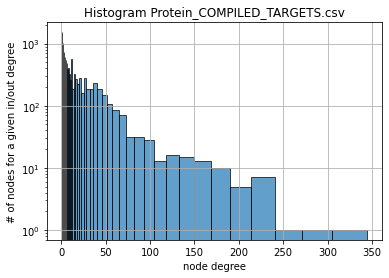

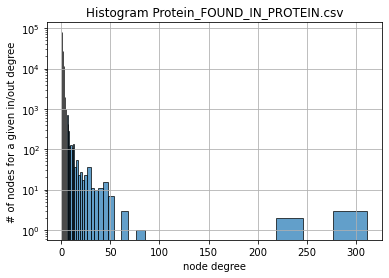

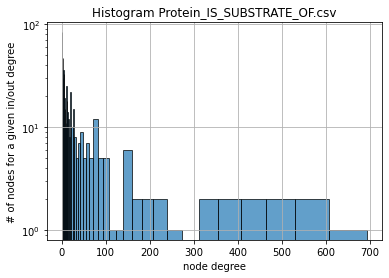

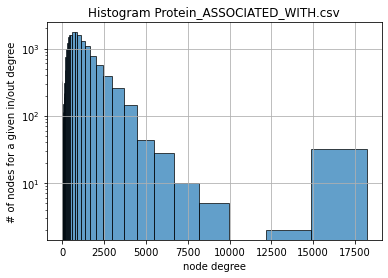

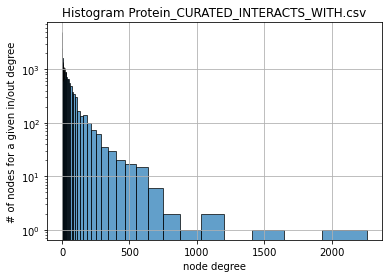

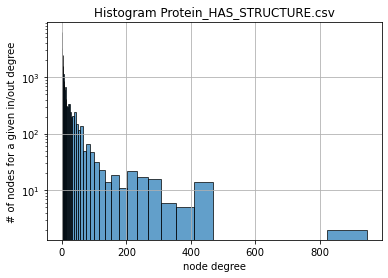

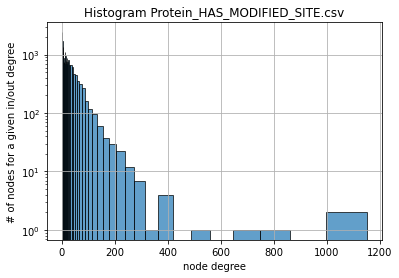

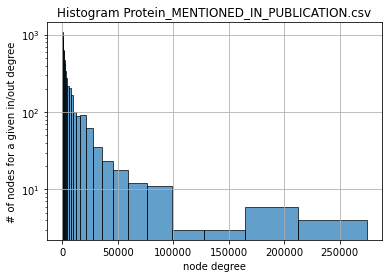

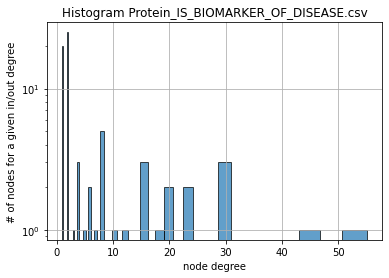

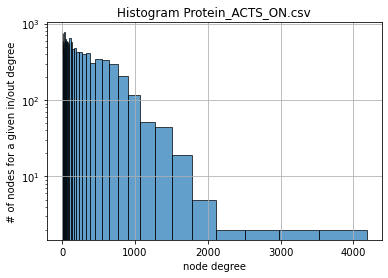

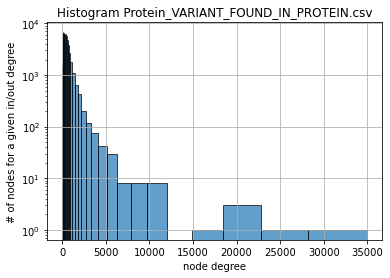

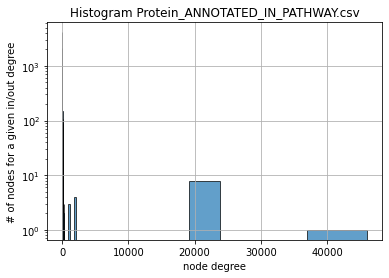

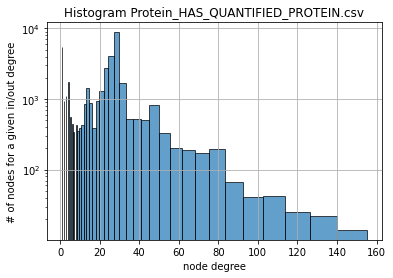

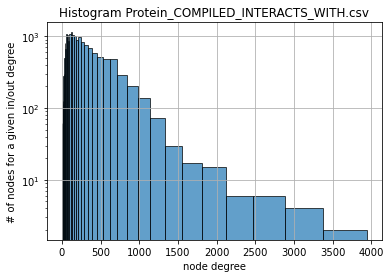

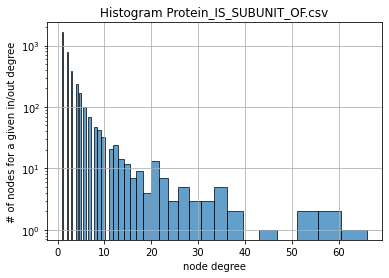

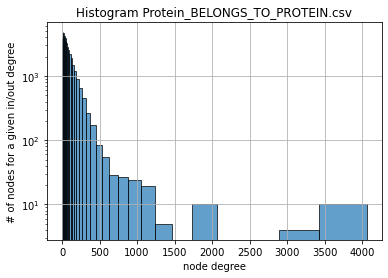

DONE


In [11]:
# For histogram
# Loop through each file in the directory
for filename in os.listdir(folder_path):
    
    #if filename.endswith('.csv'):
    matches = [".csv", "Protein"]

    if all(x in filename for x in matches):    
        filepath = os.path.join(folder_path, filename)
        # Initialize a list to store the numbers
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  

            for row in reader:
                # Ensure there's a second column
                if len(row) >= 2:
                    try:
                        # Convert the second column value to integer and append to the list
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue 
        
        # Count the occurrences of each number
        number_counts = Counter(numbers)
        # Extract the unique numbers and their counts
        node_degree = sorted(number_counts.keys())
        node_degree_freq = [number_counts[num] for num in node_degree]
        
        
        
        # Trying different binning technique 
        # Binning the node counts
        bins = np.logspace(np.log10(min(node_degree)), np.log10(max(node_degree)), 50)

        # Creating the histogram
        plt.hist(node_degree, bins=bins, weights=node_degree_freq, alpha=0.7, edgecolor='black')

        # Applying a logarithmic scale to the y-axis
        plt.yscale('log')

        # Adding labels and title
        plt.xlabel('node degree')
        plt.ylabel('# of nodes for a given in/out degree')
        plt.title('Histogram - Node Degree Distribution')
        plt.title("Histogram " + f'{filename}')
       
        plt.grid(True)
        plt.show()

        
        # Save the plot as an image file with the same name as the CSV file
        plot_filepath = os.path.splitext(filepath)[0] + 'Histogram.png'
        
        
        
        
        
        # Close the plot to release memory
        plt.close()
print("DONE")

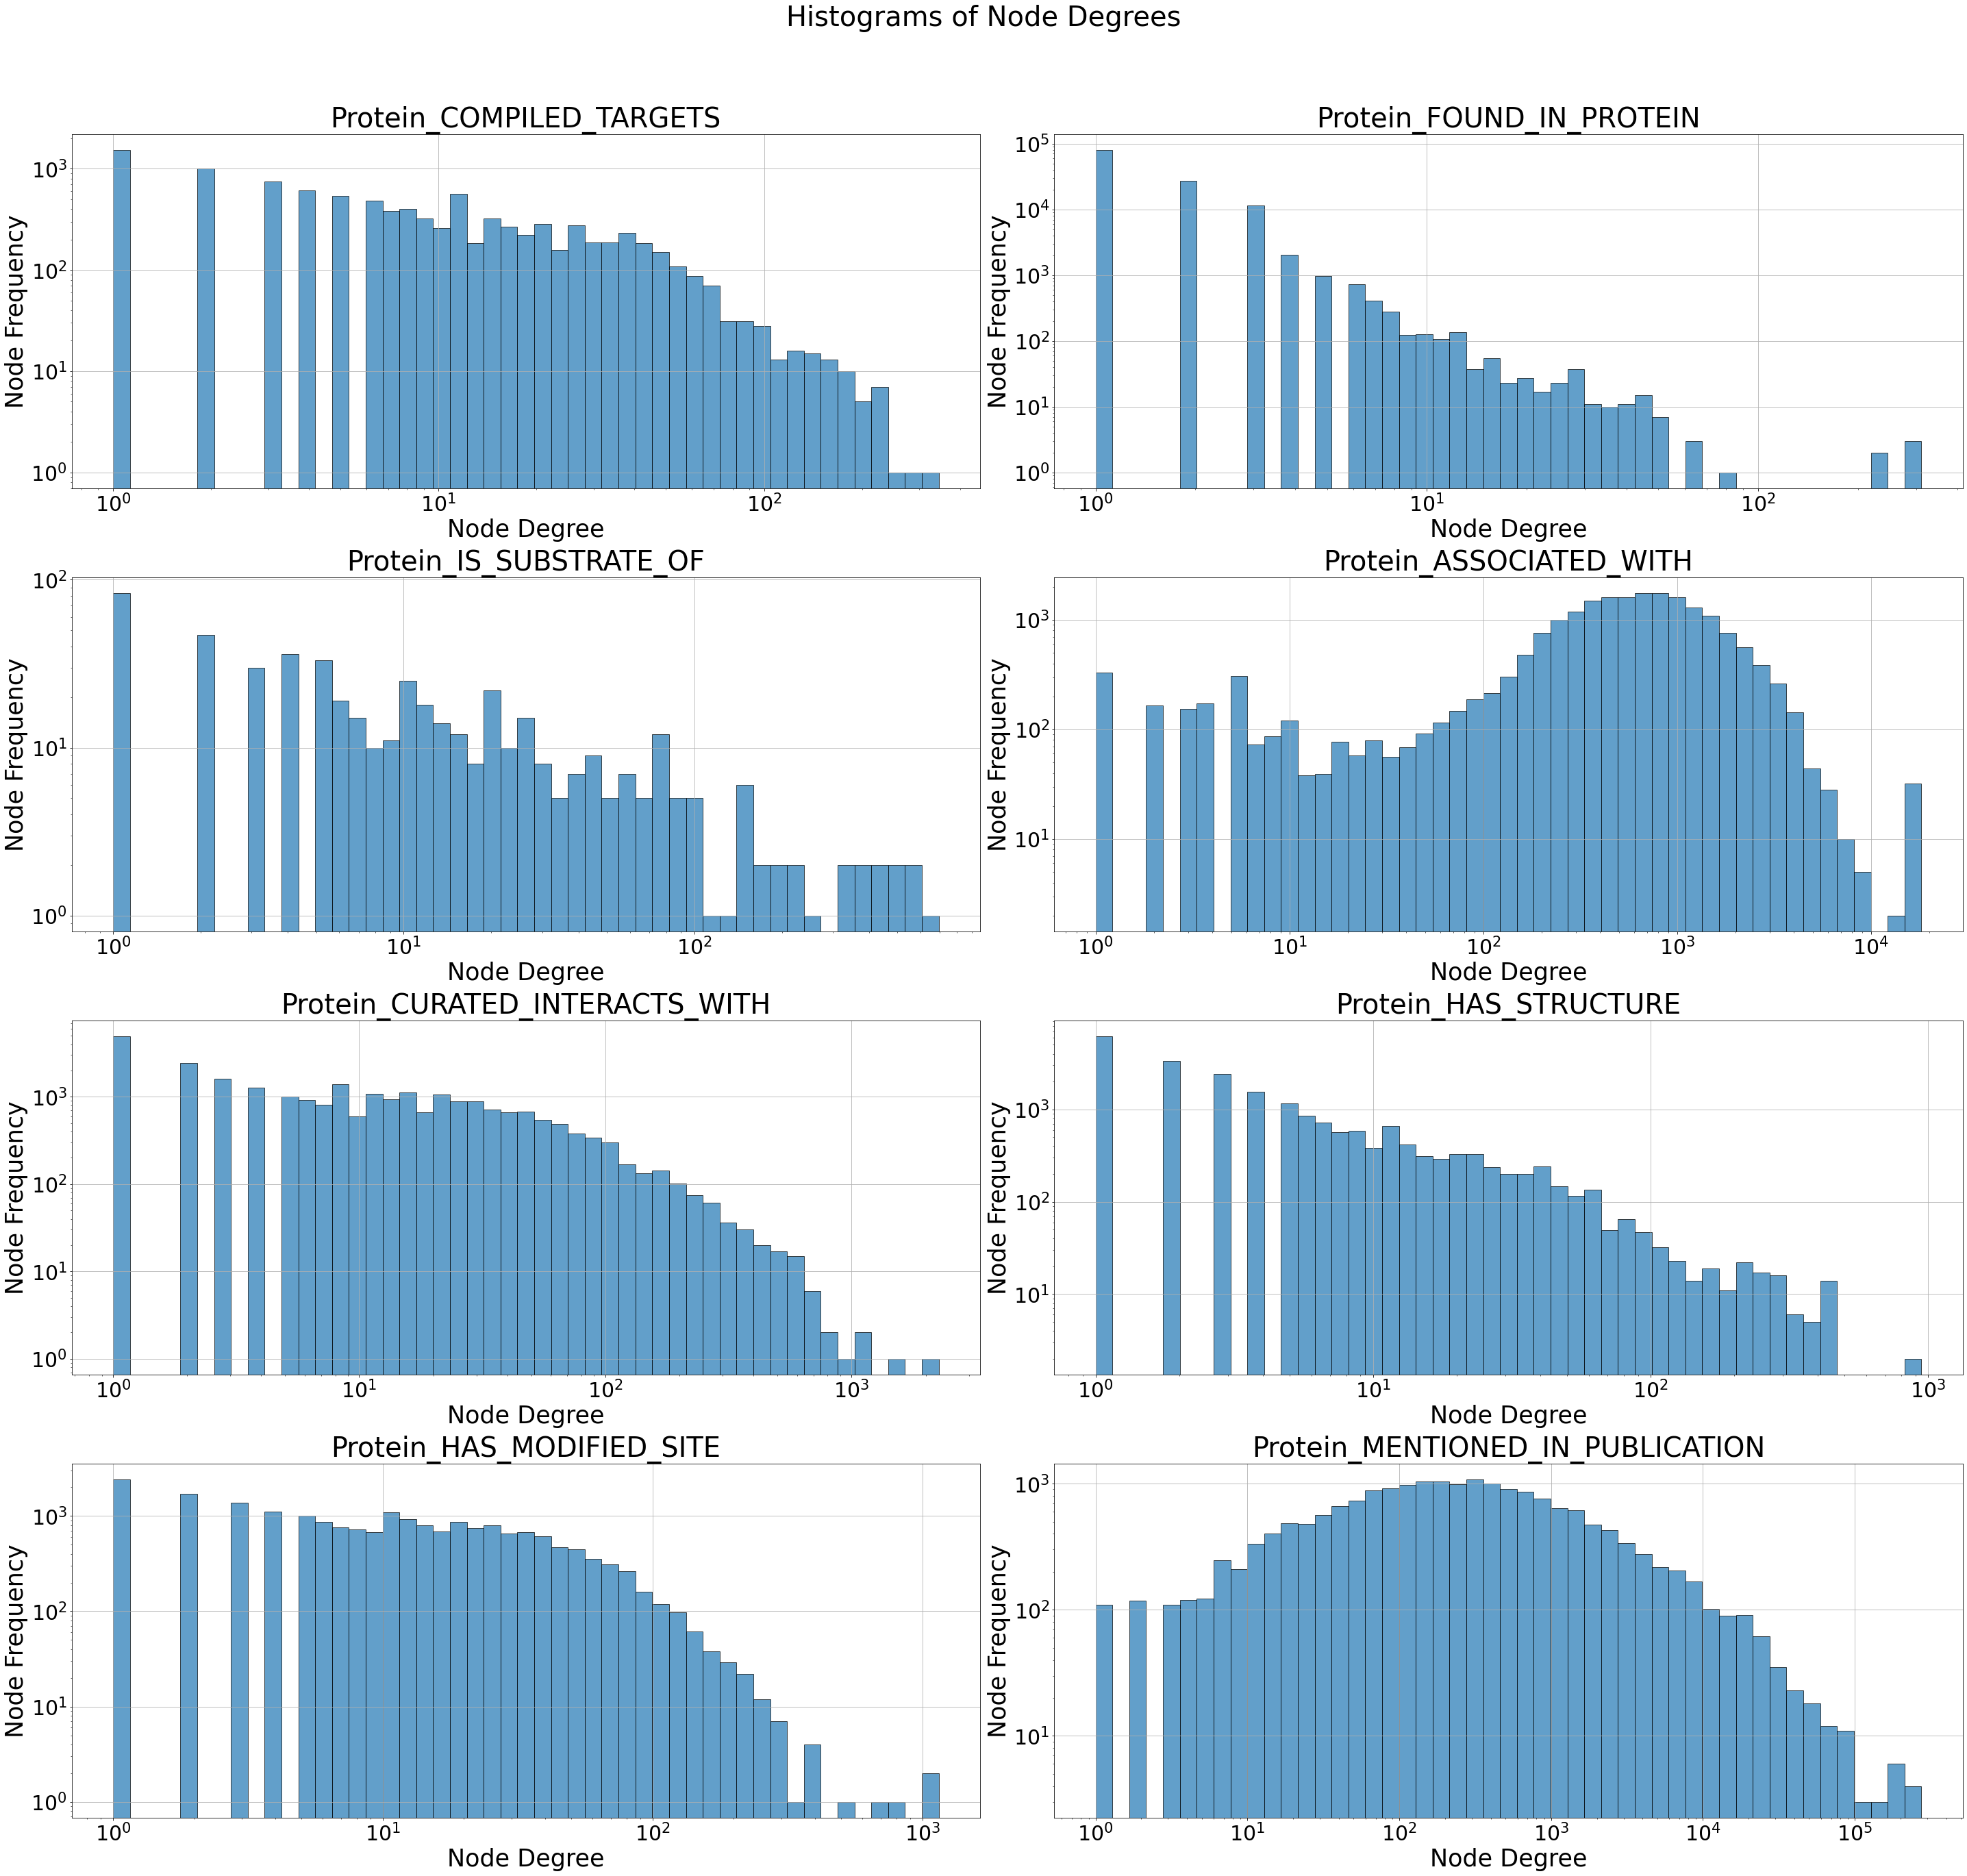

<Figure size 6000x4000 with 0 Axes>

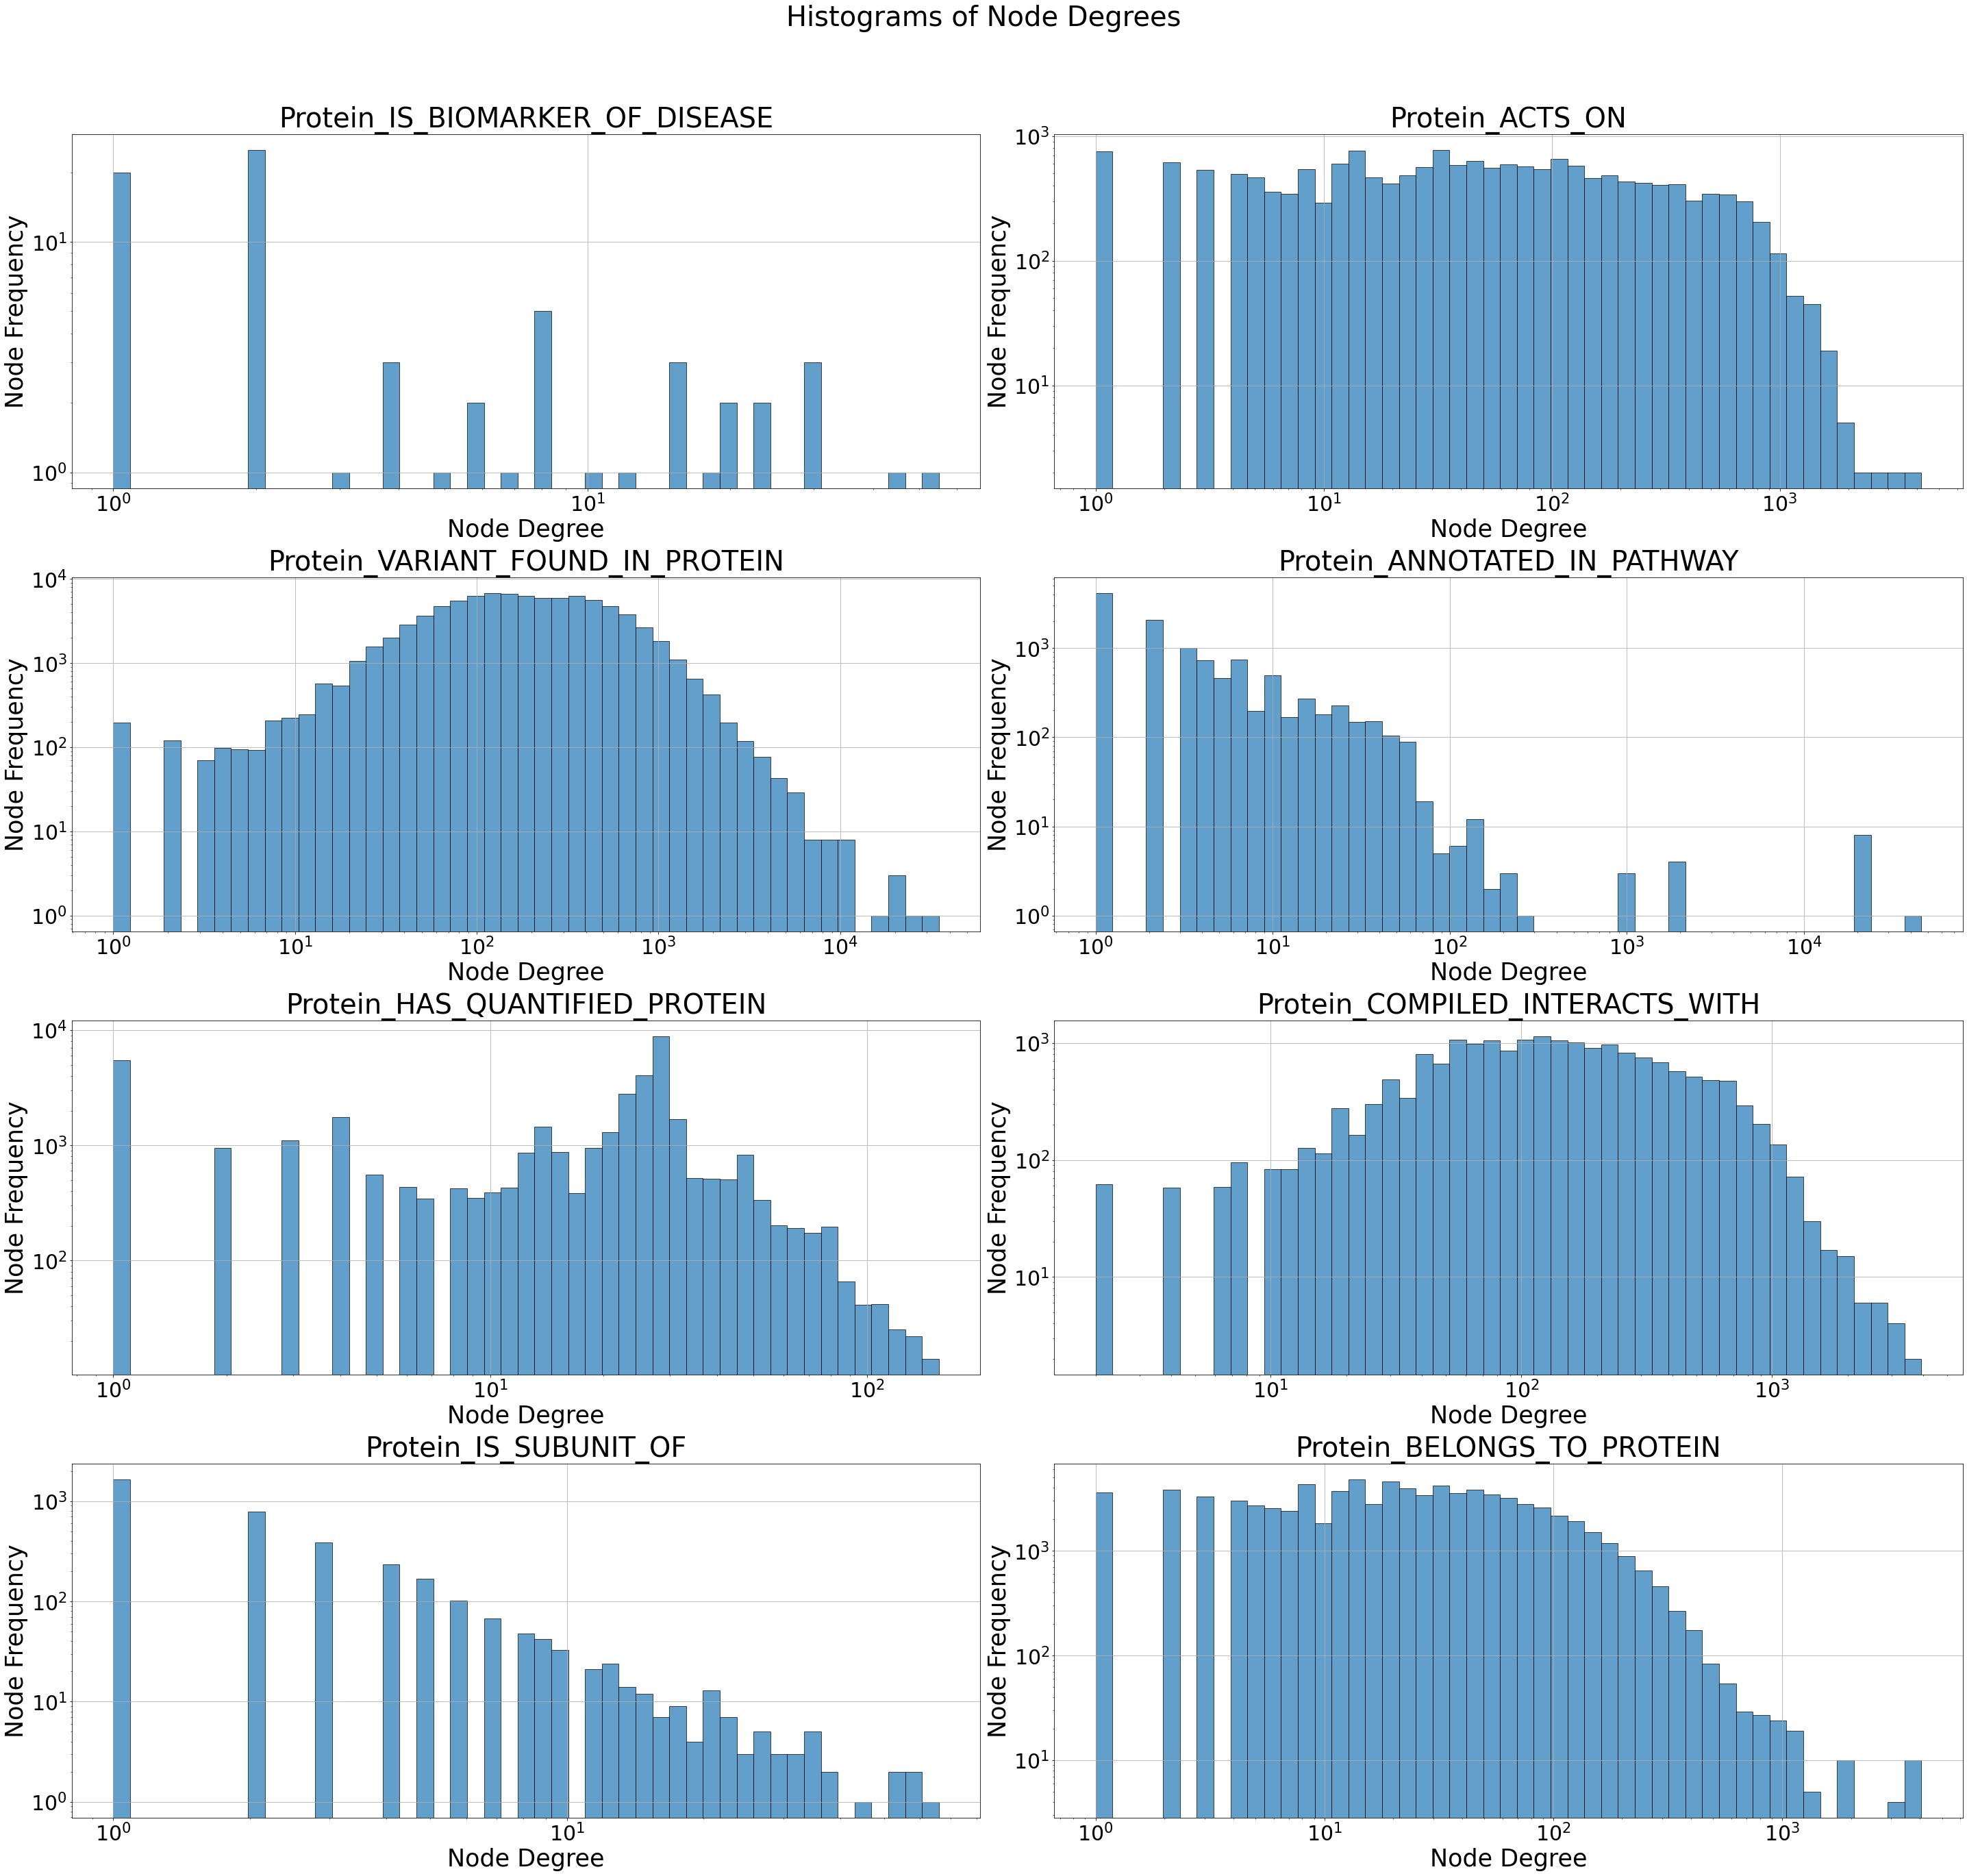

<Figure size 6000x4000 with 0 Axes>

In [24]:
def create_histogram_figure(folder_path, file_list, fig_title):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40, 40))
    axes_list = [item for sublist in axes for item in sublist]  # Flatten the list of axes

    for i, filename in enumerate(file_list):
        filepath = os.path.join(folder_path, filename)
        numbers = []

        with open(filepath, mode='r', encoding='utf-8') as file:
            reader = csv.reader(file)
            next(reader)  # Skip the header

            for row in reader:
                if len(row) >= 2:
                    try:
                        number = int(row[1].strip())
                        numbers.append(number)
                    except ValueError:
                        continue

        if numbers:
            number_counts = Counter(numbers)
            node_degree = sorted(number_counts.keys())
            node_degree_freq = [number_counts[num] for num in node_degree]

            if node_degree:
                bins = np.logspace(np.log10(min(node_degree)), np.log10(max(node_degree)), 50)
                ax = axes_list[i]
                ax.hist(node_degree, bins=bins, weights=node_degree_freq, alpha=0.7, edgecolor='black')
                ax.set_yscale('log')
                ax.set_xscale('log')
                ax.set_xlabel('Node Degree', fontsize=35)
                ax.set_ylabel('Node Frequency', fontsize=35)
                ax.set_title(f'{filename.split(".csv")[0]}', fontsize=40)
                ax.tick_params(axis='both', which='major', labelsize=30)
                ax.grid(True)

    plt.suptitle(fig_title, fontsize=40)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.figure(dpi=1000)
    plt.show()
    plt.close(fig)

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Split the files into two groups of 8
first_half_files = csv_files[:8]
second_half_files = csv_files[8:16]  # Assumes exactly 16 files

# Create first figure
create_histogram_figure(folder_path, first_half_files, 'Histograms of Node Degrees')

# Create second figure
create_histogram_figure(folder_path, second_half_files, 'Histograms of Node Degrees')
